In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import os

In [3]:
#Data = pd.read_csv('all_parameters.csv', sep=';')
path_csv = './all precipitation from meteoRu/csv/'

In [4]:
from datetime import date, timedelta
d1 = date(1800, 1, 1)  # start date
d2 = date(2017, 5, 1)  # end date
delta = d2 - d1         # timedelta
dates = []
for i in range(delta.days + 1):
    dates.append(str(d1 + timedelta(days=i)))
L = len(dates)

In [5]:
df = pd.date_range('1/1/1800', periods=L)

In [6]:
col = [i.split('.')[0] for i in os.listdir(path_csv)]
stations = col
col[:5]

['20046', '20069', '20087', '20107', '20289']

In [7]:
filename = '20087.csv'
data = pd.read_csv(path_csv + filename, sep = ';', header = None)

In [10]:
import tqdm
from IPython.display import clear_output

In [11]:
df = pd.read_csv('all_precipitation.csv', sep = ';', index_col=['Unnamed: 0'])

In [12]:
df.ix['1958-01-01', '20046']
stations = df.columns[:]
stations[:5]

Index([u'20046', u'20069', u'20087', u'20107', u'20289'], dtype='object')

In [13]:
import math
math.isnan(df.ix['1900-01-01', '20046'])
#df.iloc number of str
sum(pd.isnull(df['20046']))*1./len(df['20046'])

0.76865417805716874

In [14]:
df_crop = df.ix['1943-01-01':'2017-05-01']

# таблица с результатами

In [180]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date, timedelta

d1 = date(1900, 1, 1)  # start date
d2 = date(2017, 5, 1)  # end date

#today = datetime.date.today()
#current = datetime.date(2010, 8, 1)    
dates = []
while d1 <= d2:
    dates.append(d1)
    d1 += relativedelta(months=1)
every_m_d = [i.strftime("%Y-%m-%d") for i in dates]

In [181]:
step = 1 #years
delta = '1'

In [182]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date, timedelta

d1 = date(1900, 1, 1)  # start date
d2 = date(2017, 5, 1)  # end date

#today = datetime.date.today()
#current = datetime.date(2010, 8, 1)    
dates = []
while d1 <= d2:
    dates.append(d1)
    d1 += relativedelta(years=step)
every_y_d = [i.strftime("%Y-%m-%d") for i in dates]

In [183]:
every_y_d[:5]

['1900-01-01', '1901-01-01', '1902-01-01', '1903-01-01', '1904-01-01']

In [184]:
df.ix['2015-05-01':'2015-05-04', stations[0]]

2015-05-01    0.0
2015-05-02    0.0
2015-05-03    0.0
2015-05-04    0.0
Name: 20046, dtype: float64

In [185]:
s = every_m_d[0]
y = int(s.split('-')[0]) + 1

d2 = date(2017, 5, 1) 
d2.strftime("%Y-%m-%d")
len(every_m_d)

1409

In [186]:
import scipy.stats as ss
import scipy.optimize as so
def likelihood_f(P, x, neg=-1):
    n=np.round(P[0]) #by definition, it should be an integer 
    p=P[1]
    loc = 0
    return neg*(np.log(ss.nbinom.pmf(x, n, p, loc))).sum()

In [187]:
import tqdm
from IPython.display import clear_output

In [188]:
every_m_d = every_y_d[:]

In [189]:
Data = pd.read_csv('parameters_dist (1).csv', sep=';')
d = np.array(Data)
Data.head()

,station_number,Наименование станции,широта,долгота,Высота метеопл.,Начало наблюдений,P_dry,P_precipitation,R_dry,R_precipitation,Примечание
0,20046,"Им.Э.Т.Кренкеля, ГМО",80° 37′,58° 03′,21,1957,0.335170,0.340507,0.531765,0.848560,NaN
1,20069,Визе,79° 30′,76° 59′,10,1945,0.328538,0.326670,0.557684,0.670259,NaN
2,20087,Голомянный,79° 33′,90° 37′,7,1940,0.276468,0.372990,0.522933,0.753648,NaN
3,20107,Баренцбург,78° 04′,14° 15′,22,1940,0.337569,0.299524,0.508110,0.825346,NaN
4,20289,Русский,77° 10′,96° 26′,9,1940,0.275476,0.386928,0.540427,0.709338,Закрыта в 1999 г.


In [190]:
ind = 0
r = Data.iloc[ind]['R_precipitation']
p = Data.iloc[ind]['P_precipitation']

r = Data.iloc[ind]['R_dry']
p = Data.iloc[ind]['P_dry']

In [191]:
%%time
annual_parameter_r_pr = pd.DataFrame( index=every_m_d, columns=stations)
annual_parameter_p_pr = pd.DataFrame( index=every_m_d, columns=stations)
annual_parameter_r_dr = pd.DataFrame( index=every_m_d, columns=stations)
annual_parameter_p_dr = pd.DataFrame( index=every_m_d, columns=stations)
directory = './'+delta + '_years'+ '__steps_' + str(step) + '_' +str(datetime.date.today()) + '/'
if not os.path.exists(directory):
    os.makedirs(directory)
directory_png = './'+delta + '_years'+ '__steps_' + str(step) + '_' +str(datetime.date.today()) + '/' + 'png/'
if not os.path.exists(directory_png):
    os.makedirs(directory_png)
ind = -1
for st in tqdm.tqdm(stations):
    ind += 1
    # st = station[0]
    #st = '27612'
    data = df[st]
    for date1 in every_m_d:
        #date1 = every_m_d[1300]
        dat = date1.split('-')
        y2 = int(dat[0]) + int(delta)
        m2 = int(dat[1])
        d2 = int(dat[2])
        date2 = date(y2, m2, d2).strftime("%Y-%m-%d")
        #print (date1, date2, st)
        X = df.ix[date1:date2, st]
        if len(X) > 0 and sum(X.notnull())*1./len(X) > 0.9:
            precipitation_without_nan = X.dropna()

            #precipitation
            length_of_precipitation = [];
            l = 0.;
            for i  in range(1, len(precipitation_without_nan)):
                if precipitation_without_nan[i] <= 0.0:
                    if l > 0:
                        length_of_precipitation.append(l - 1)
                    l = 0;
                else:
                    l += 1;

            r = Data.iloc[ind]['R_precipitation']
            p = Data.iloc[ind]['P_precipitation']
            _ = so.minimize(likelihood_f, [r,p],args = (length_of_precipitation, -1), method='Nelder-Mead', options={'xtol': 1e-9})
            res_precipitation = _.fun
            r_precipitation, p_precipitation = _.x
            #dryperiods
            length_of_dry = [];
            l = 0.;
            for i  in range(1, len(precipitation_without_nan)):
                if precipitation_without_nan[i] > 0.0:
                    if l > 0:
                        length_of_dry.append(l - 1)
                    l = 0;
                else:
                    l += 1;

            #r, p = 0.7, 0.3
            r = Data.iloc[ind]['R_dry']
            p = Data.iloc[ind]['P_dry']
            _ = so.minimize(likelihood_f, [r,p],args = (length_of_dry, -1), method='Nelder-Mead', options={'xtol': 1e-9})
            res_dry = _.fun
            r_dry, p_dry = _.x  
            annual_parameter_r_pr.ix[date1, st] = r_precipitation
            annual_parameter_p_pr.ix[date1, st] = p_precipitation
            annual_parameter_r_dr.ix[date1, st] = r_dry
            annual_parameter_p_dr.ix[date1, st] = p_dry
    #     else:
    #         annual_parameter_r_pr.ix[date1, st] = -1
    #         annual_parameter_p_pr.ix[date1, st] = -1
    #         annual_parameter_r_dr.ix[date1, st] = -1
    #         annual_parameter_p_dr.ix[date1, st] = -1

    a = [i for i in annual_parameter_r_pr[st]]
    b = [i for i in annual_parameter_p_pr[st]]
    c = [i for i in annual_parameter_r_dr[st]]
    d = [i for i in annual_parameter_p_dr[st]]
    # x_values = stations[:]

    # #Out[2]: <matplotlib.collections.PathCollection at 0x39686d0>

    plt.figure(figsize=(15,10))
    plt.plot(a, 'yo-')
    plt.plot(b, 'go-')
    plt.plot(c, 'ro-')
    plt.plot(d, 'bo-')
    plt.xlabel('data',fontsize = 20)
    plt.ylabel('values',fontsize = 20)
    plt.legend(['r_pr', 'p_pr', 'r_dr', 'p_dr'], fontsize = 20)
    plt.savefig(directory + 'png/' + st + '_' + delta + '_years_st_' + str(step) + '.png')
    
    annual_parameter_p_dr.to_csv(directory+delta + '_years_annual_parameter_p_dr.csv', sep = ';')
    annual_parameter_r_dr.to_csv(directory+delta + '_years_annual_parameter_r_dr.csv', sep = ';')
    annual_parameter_p_pr.to_csv(directory+delta + '_years_annual_parameter_p_pr.csv', sep = ';')
    annual_parameter_r_pr.to_csv(directory+delta + '_years_annual_parameter_r_pr.csv', sep = ';')
    clear_output(True)

100%|██████████| 600/600 [1:17:28<00:00,  6.06s/it]

CPU times: user 1h 11min 25s, sys: 1min 19s, total: 1h 12min 44s
Wall time: 1h 17min 29s


In [192]:
print directory

./1_years__steps_1_2017-05-10/


# чтение таблиц и выявление тренда

In [195]:
p_dr = pd.read_csv(directory+delta + '_years_annual_parameter_p_dr.csv', sep = ';')#, index_col=['Unnamed: 0'])
r_dr = pd.read_csv(directory+delta + '_years_annual_parameter_r_dr.csv', sep = ';')#, index_col=['Unnamed: 0'])
p_pr = pd.read_csv(directory+delta + '_years_annual_parameter_p_pr.csv', sep = ';')#, index_col=['Unnamed: 0'])
r_pr = pd.read_csv(directory+delta + '_years_annual_parameter_r_pr.csv', sep = ';')#, index_col=['Unnamed: 0'])





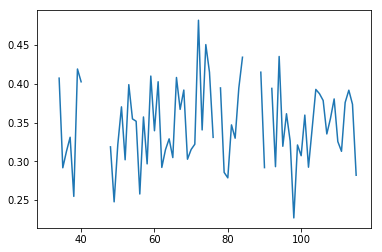

In [196]:
stations = p_dr.columns[1:]
data = p_dr.ix[:, stations[3]][:]
plt.plot(data)
plt.show()

In [197]:
def (array_name,)
for st in stations:
    data = annual_parameter_p_dr.ix[:, stations[3]][:]

SyntaxError: invalid syntax (<ipython-input-197-e7bbacca7ae5>, line 1)

In [198]:
col = p_dr.columns[1:]
path_img = '../написание диплома/LaTeX/images/'
from sklearn import linear_model

100%|██████████| 600/600 [00:03<00:00, 175.64it/s]


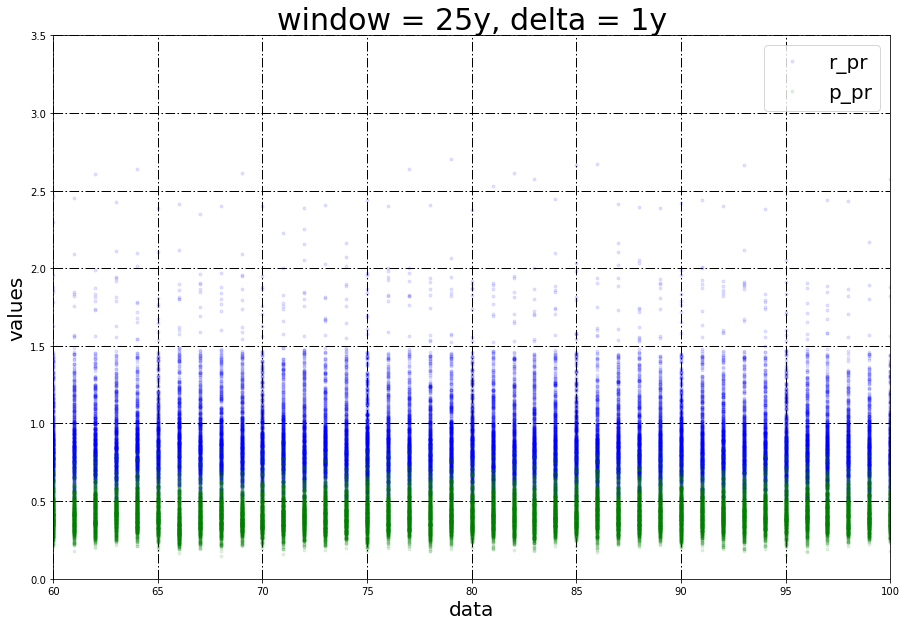

In [199]:
plt.figure(figsize=(15,10))
plt.xlim(60, 100)
plt.ylim(0, 3.5)
plt.xlabel('data',fontsize = 20)
plt.ylabel('values',fontsize = 20)


for st in tqdm.tqdm(col):
    #st = col[0]
    a = [i for i in r_pr[st]]
    b = [i for i in p_pr[st]]
    c = [i for i in r_dr[st]]
    d = [i for i in p_dr[st]]

    alpha0 = 0.1
    plt.plot(a, 'b.', alpha = alpha0)
    plt.plot(b, 'g.', alpha = alpha0)
#     plt.plot(c, 'r', alpha = alpha0)
#     plt.plot(d, 'b', alpha = alpha0)
    
    
    
    #clear_output(True)

plt.grid(color='black', linestyle='-.', linewidth=1)
# plt.legend(['r_pr', 'p_pr', 'r_dr', 'b_dr'], fontsize = 20)
plt.legend(['r_pr', 'p_pr'], fontsize = 20)
plt.title('window = 25y, delta = 1y', fontsize = 30)
plt.savefig(path_img + 'part_trend' + '.pdf')
plt.show()
plt.close()

In [226]:
b_r_pr = []
b_p_pr = []
b_r_dr = []
b_p_dr = []

In [227]:
a_r_pr = []
for st in col:
#st = col[0]
    x = []
    y = []
    for ind, i in enumerate(r_pr[st]):
        if not math.isnan(i):
            x.append(ind)
            y.append(i)
    X = x[:]
    X = np.array(X).reshape(-1, 1) # R
    y = np.array(y).reshape(-1, 1) # P
    size = y.shape
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    #print regr.coef_
    a = regr.coef_[0][0]
    a_r_pr.append(a)
    b = regr.intercept_[0]
    b_r_pr.append(b)
    # plt.plot(x, y, '.')
    # plt.plot(X, a*X + b)
    # plt.show()


In [228]:
a_p_pr = []
for st in col:
#st = col[0]
    x = []
    y = []
    for ind, i in enumerate(p_pr[st]):
        if not math.isnan(i):
            x.append(ind)
            y.append(i)
    X = x[:]
    X = np.array(X).reshape(-1, 1) # R
    y = np.array(y).reshape(-1, 1) # P
    size = y.shape
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    #print regr.coef_
    a = regr.coef_[0][0]
    a_p_pr.append(a)
    b = regr.intercept_[0]
    b_p_pr.append(b) 
    
a_r_dr = []
for st in col:
#st = col[0]
    x = []
    y = []
    for ind, i in enumerate(r_dr[st]):
        if not math.isnan(i):
            x.append(ind)
            y.append(i)
    X = x[:]
    X = np.array(X).reshape(-1, 1) # R
    y = np.array(y).reshape(-1, 1) # P
    size = y.shape
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    #print regr.coef_
    a = regr.coef_[0][0]
    a_r_dr.append(a)
    b = regr.intercept_[0]
    b_r_dr.append(b)
    
a_p_dr = []
for st in col:
#st = col[0]
    x = []
    y = []
    for ind, i in enumerate(p_dr[st]):
        if not math.isnan(i):
            x.append(ind)
            y.append(i)
    X = x[:]
    X = np.array(X).reshape(-1, 1) # R
    y = np.array(y).reshape(-1, 1) # P
    size = y.shape
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    #print regr.coef_
    a = regr.coef_[0][0]
    a_p_dr.append(a)
    b = regr.intercept_[0]
    b_p_dr.append(b)

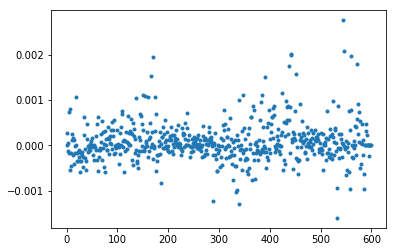

In [229]:
plt.plot (a_r_dr, '.')
plt.show()

In [205]:
print 'p_dr', sum(a_p_dr)/len(a_p_dr)
print 'r_dr', sum(a_r_dr)/len(a_r_dr)
print 'p_pr', sum(a_p_pr)/len(a_p_pr)
print 'r_pr', sum(a_r_pr)/len(a_r_pr)

p_dr -0.000129976754104
r_dr 8.05194942936e-05
p_pr 6.10747351269e-05
r_pr -6.96611475633e-05


# draw in map

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

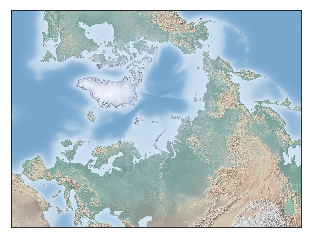

In [208]:
Data = pd.read_csv('parameters_dist (1).csv', sep=';')
d = np.array(Data)
Data.head()
latitude = Data['широта']
longitude = Data['долгота']
name = Data['Наименование станции']
def transforation_coordinate (s):
    s = s.replace('о', '').replace('o', '').replace('′', '').replace('’', '').replace('\xc2\xb0', '').replace('\xc2\xa0', '').replace(' ', '')
    gr = int(s)//100
    m = float(s)%100
    #print 'gr:', gr, 'min:', m
    return gr + m/60
transforation_coordinate('80° 37′')
lat = np.array([transforation_coordinate(i) for i in latitude])
lon = np.array([transforation_coordinate(i) for i in longitude])
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_0=82., lon_0 = 55.)
m.shadedrelief()
plt.show()

In [209]:
def f(par, pic_name, save_name):   
    par = np.array(par)
    plt.figure(figsize=(15,10))
    
    m = Basemap(width=12000000,height=9000000,projection='lcc',
                resolution='c',lat_1=50.,lat_2=80,lat_0=65,lon_0=82.)
    m.shadedrelief()
    
    parallels = np.arange(0.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])


    
    xpt,ypt = m(lon,lat)
    plt.scatter(xpt, ypt, c = par, cmap='afmhot')
    
    plt.colorbar()
    plt.title(pic_name.decode('utf-8'), fontsize = 20,  y=1.04)
    plt.savefig(path.decode('utf-8') + save_name.decode('utf-8') + '.pdf')
    #plt.show()
    plt.close()

In [210]:
path = '../написание диплома/LaTeX/images/'
f(a_r_pr[:], 'коэффициент линейной регрессии при измерении тренда\n параметра r для дождливых периодов', 'trend_coef_r_pr')

In [211]:
f(a_p_pr[:], 'коэффициент линейной регрессии при измерении тренда\n параметра p для дождливых периодов', 'trend_coef_p_pr')
f(a_r_dr[:], 'коэффициент линейной регрессии при измерении тренда\n параметра r для сухих периодов', 'trend_coef_r_dr')
f(a_p_dr[:], 'коэффициент линейной регрессии при измерении тренда\n параметра p для сухих периодов', 'trend_coef_p_dr')

100%|██████████| 600/600 [00:03<00:00, 157.29it/s]


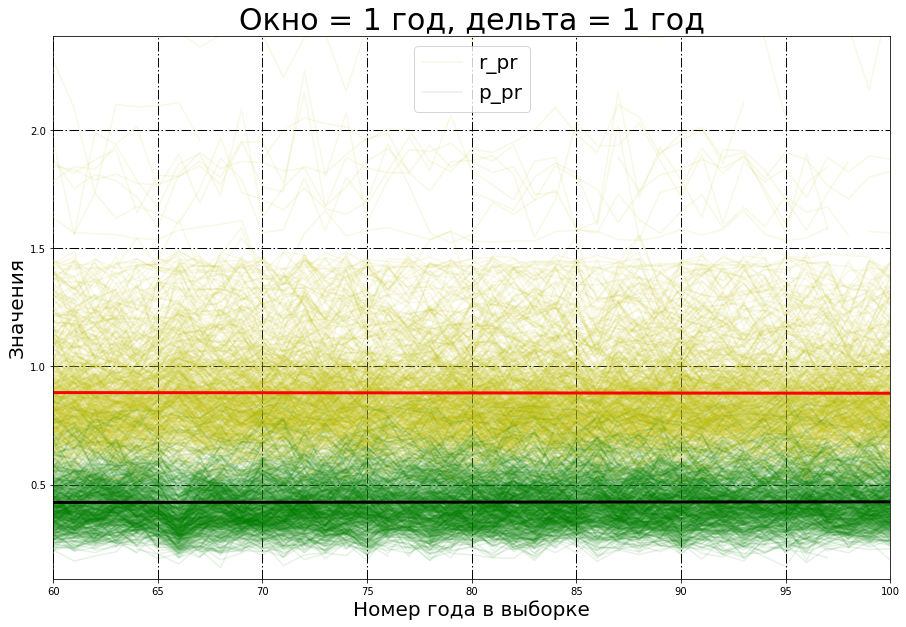

In [235]:
plt.figure(figsize=(15,10))
plt.xlim(60, 100)
x = np.arange(60, 101, 1)
plt.ylim(0.1, 2.4)
plt.xlabel('Номер года в выборке'.decode('utf-8'),fontsize = 20)
plt.ylabel('Значения'.decode('utf-8'),fontsize = 20)


for st in tqdm.tqdm(col):
    #st = col[0]
    a = r_pr[st]
    b = p_pr[st]
    c = r_dr[st]
    d = p_dr[st]

    alpha0 = 0.1
    plt.plot(a, 'y', alpha = alpha0)
    plt.plot(b, 'g', alpha = alpha0)
#     plt.plot(c, 'r', alpha = alpha0)
#     plt.plot(d, 'b', alpha = alpha0)
    
    
    
    #clear_output(True)
plt.plot(x, sum(a_r_pr)/len(a_r_pr) * x + sum(b_r_pr)/len(b_r_pr), 'red', lw= 3)
plt.plot(x, sum(a_p_pr)/len(a_p_pr) * x + sum(b_p_pr)/len(b_p_pr), 'black', lw = 3)
plt.grid(color='black', linestyle='-.', linewidth=1)
# plt.legend(['r_pr', 'p_pr', 'r_dr', 'b_dr'], fontsize = 20)
plt.legend(['r_pr', 'p_pr'], fontsize = 20)
plt.title('Окно = 1 год, дельта = 1 год'.decode('utf-8'), fontsize = 30)
plt.savefig(path_img + 'part_trend' + '.pdf')
plt.show()
plt.close()